# <span style=color:blue> Numerical Simulation Laboratory #
## <span style=color:blue> Exercise lecture 11 ##
### Mattia Nasi 11590A ###

## <span style=color:red> 11.1 ##


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.callbacks import EarlyStopping

m = 2 # slope
q= 1 # intersect

def generate_data(n_train, sigma):
    x_train = np.random.uniform(-1, 1, n_train)
    y_train = np.random.normal(m * x_train + q, sigma)
    
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_valid = np.random.normal(m * x_valid + q, sigma)
    
    return x_train, y_train, x_valid, y_valid

def train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=30, batch_size=32):
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(
        x=x_train, y=y_train, 
        batch_size=batch_size, 
        epochs=epochs,
        shuffle=True, 
        validation_data=(x_valid, y_valid),
        verbose=0  # suppress output
    )

    val_loss = model.evaluate(x_valid, y_valid, verbose=0)[0]
    return val_loss


2025-06-08 16:57:12.741976: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


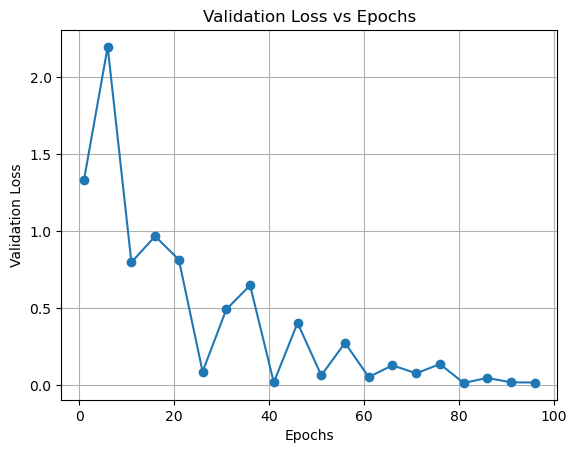

In [39]:
epoch_range = range(1, 101, 5)
losses_epochs = []

for e in epoch_range:
    x_train, y_train, x_valid, y_valid = generate_data(n_train=100, sigma=0.1)
    loss = train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=e)
    losses_epochs.append(loss)

plt.plot(epoch_range, losses_epochs, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.grid(True)
plt.show()


2025-06-08 16:56:10.970455: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


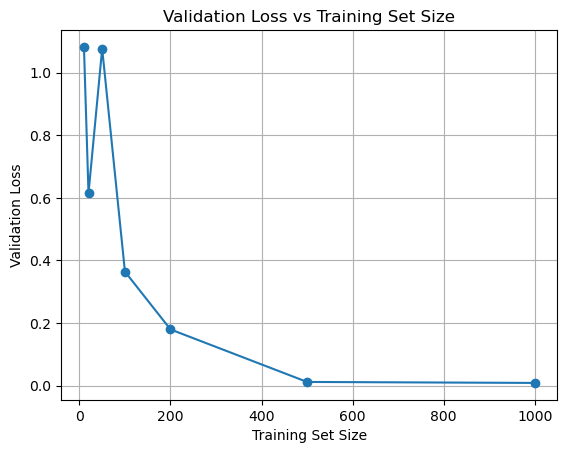

In [37]:
train_sizes = [10, 20, 50, 100, 200, 500, 1000]
losses_sizes = []

for size in train_sizes:
    x_train, y_train, x_valid, y_valid = generate_data(n_train=size, sigma=0.1)
    loss = train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=30)
    losses_sizes.append(loss)

plt.plot(train_sizes, losses_sizes, marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Training Set Size")
plt.grid(True)
plt.show()


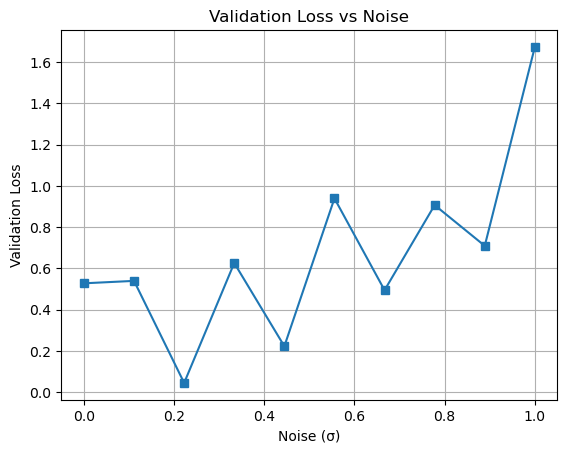

In [41]:
sigma_values = np.linspace(0, 1, 10)
losses_sigma = []

for sigma in sigma_values:
    x_train, y_train, x_valid, y_valid = generate_data(n_train=100, sigma=sigma)
    loss = train_and_evaluate(x_train, y_train, x_valid, y_valid, epochs=30)
    losses_sigma.append(loss)

plt.plot(sigma_values, losses_sigma, marker='s')
plt.xlabel("Noise (σ)")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Noise")
plt.grid(True)
plt.show()


## <span style=color:red> 11.2 ##


In [53]:
b = 4
m1 = -3
m2 = -2
m3 = 3

np.random.seed(0)
x_train_2 = np.random.uniform(-1, 1, 10000)
x_valid_2 = np.random.uniform(-1, 1, 2000)
x_valid_2.sort()
y_target_2 = b + m1 * x_valid + m2 * (x_valid_2)**2 + m3 * (x_valid_2)**3 

sigma_2 = 0.1 # noise standard deviation, for the moment it is absent
y_train_2 = np.random.normal(b + m1 * x_train_2 + m2 * (x_train_2)**2 + m3 * (x_train_2)**3, sigma_2) # actual measures from which we want to guess regression parameters
y_valid_2 = np.random.normal(b + m1 * x_valid_2 + m2 * (x_valid_2)**2 + m3 * (x_valid_2)**3 , sigma_2)

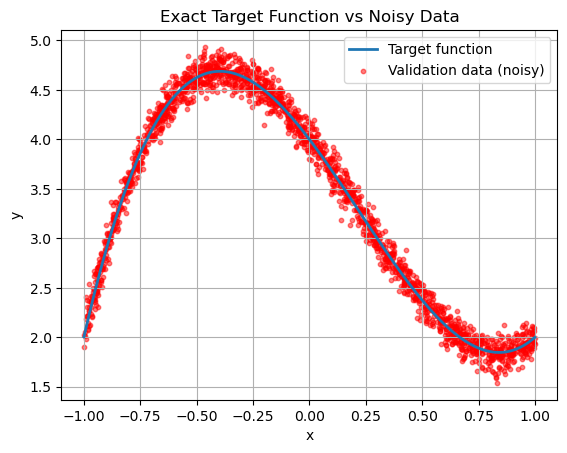

In [55]:
x_valid_sorted = np.sort(x_valid_2)
y_target_sorted = b + m1 * x_valid_sorted + m2 * x_valid_sorted**2 + m3 * x_valid_sorted**3

plt.plot(x_valid_sorted, y_target_sorted, label='Target function', linewidth=2)
plt.scatter(x_valid, y_valid, color='red', s=10, alpha=0.5, label='Validation data (noisy)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact Target Function vs Noisy Data")
plt.legend()
plt.grid(True)
plt.show()

In [57]:

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=10,          
    min_delta=1e-5,       
    restore_best_weights=True 
)

model = Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = model.fit(x=x_train_2, y=y_train_2, 
          batch_size=32, epochs=100,
          shuffle=True, 
          callbacks=[early_stop],
          validation_data=(x_valid_2, y_valid_2))

Epoch 1/100


2025-06-08 16:59:42.273157: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 7.3661 - mse: 7.3661 - val_loss: 0.4290 - val_mse: 0.4290
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2808 - mse: 0.2808 - val_loss: 0.0564 - val_mse: 0.0564
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/ste

In [61]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - mse: 0.0109 

Test loss: 0.010466636158525944
Test accuracy: 0.010466636158525944


In [63]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3709e-04 - mse: 5.3709e-04

Test loss: 0.00042341198422946036
Test accuracy: 0.00042341198422946036


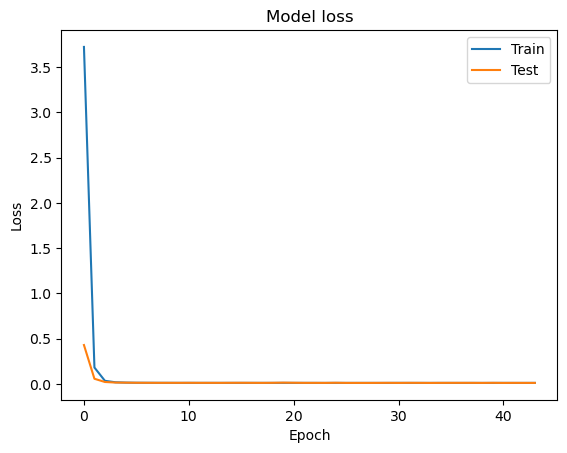

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


2025-06-08 17:02:17.762213: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


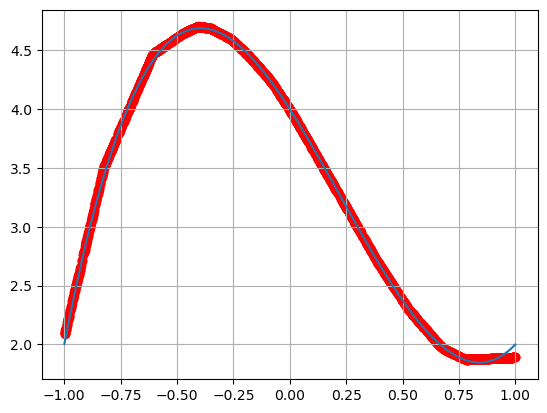

In [69]:
x_predicted = np.random.uniform(-1, 1, 2000)
y_predicted = model.predict(x_predicted)

#x_predicted_out = np.random.uniform(-2, -1, 10)
#y_predicted_out = model.predict(x_predicted_out)

plt.scatter(x_predicted, y_predicted,color='r')
#plt.scatter(x_predicted_out, y_predicted_out, color='g')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

If early stopping is adopted the model struggles to evaluate the boundary behaviors, leaving it run for all the 100 epochs takes time but replicate well the whole function 

## Esercizio 11.3 ##

In [106]:
x_t = np.random.uniform(-3./2., 3./2., size=(10000,2)) 
x_v = np.random.uniform(-3./2., 3./2., size=(2000,2)) 
y_tar = np.sin(x_t[:,0]**2+x_t[:,1]**2)

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_t = np.random.normal(np.sin(x_t[:,0]**2+x_t[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_v = np.random.normal(np.sin(x_v[:,0]**2+x_v[:,1]**2), sigma)

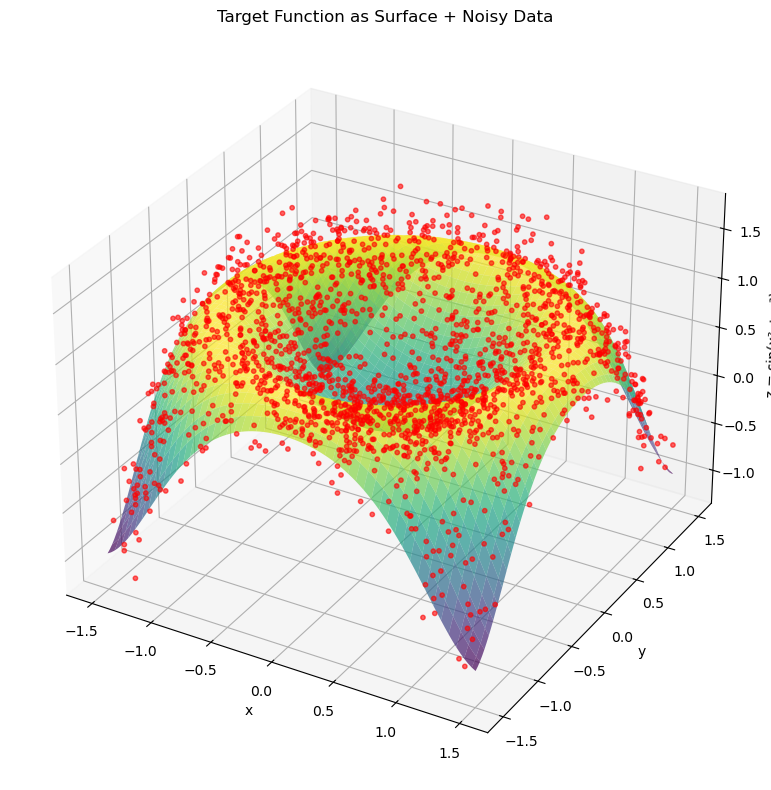

In [108]:
grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_z = np.sin(grid_x**2 + grid_y**2)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie continua (funzione target)
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.7, edgecolor='none', label='Target function')

# Scatter dati di training
#ax.scatter(x_t[:, 0], x_t[:, 1], y_t, color='blue', s=10, alpha=0.5, label='Training data')

# Scatter dati di validazione
ax.scatter(x_v[:, 0], x_v[:, 1], y_v, color='red', s=10, alpha=0.6, label='Validation data')

# Etichette
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z = sin(x² + y²)')
ax.set_title('Target Function as Surface + Noisy Data')
plt.tight_layout()

In [110]:

model1 = Sequential()
model1.add(Dense(128, input_shape=(2,), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)               │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
history1 = model1.fit(
    x=x_t, y=y_t,
    batch_size=32,
    epochs=100,
    shuffle=True,
    validation_data=(x_v, y_v)
)

Epoch 1/100


2025-06-08 17:11:28.057342: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2264 - mse: 0.2264 - val_loss: 0.1696 - val_mse: 0.1696
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1651 - mse: 0.1651 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1471 - mse: 0.1471 - val_loss: 0.1400 - val_mse: 0.1400
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1355 - mse: 0.1355 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1153 - mse: 0.1153 - val_loss: 0.1077 - val_mse: 0.1077
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0714 - val_mse: 0.0714
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss:

In [114]:
score1 = model1.evaluate(x_v, y_v, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409 - mse: 0.0409 

Test loss: 0.00042341198422946036
Test accuracy: 0.00042341198422946036


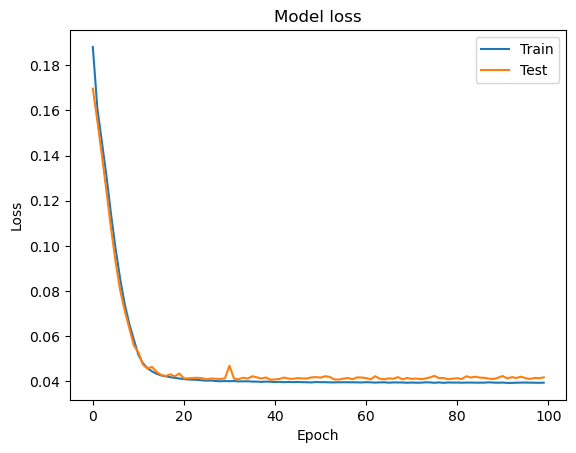

In [116]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

24/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

2025-06-08 17:14:39.331636: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


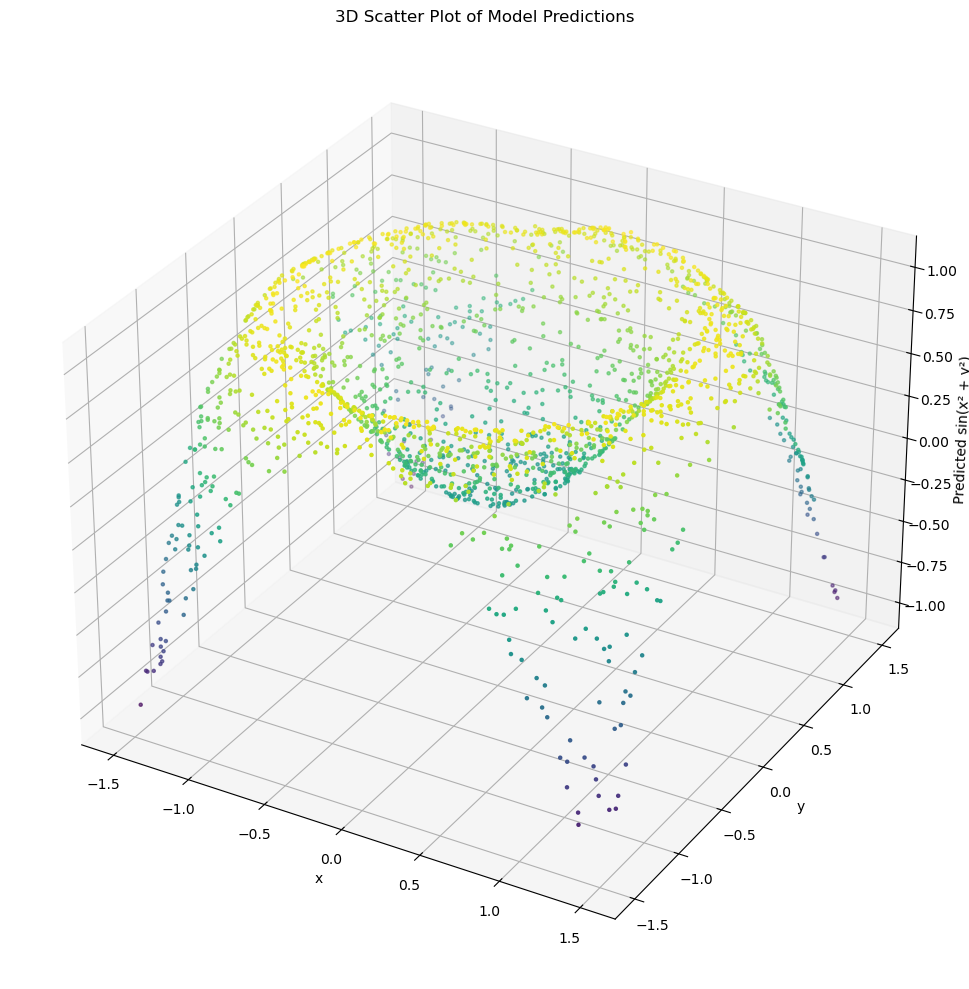

In [118]:
x_p = np.random.uniform(-3./2., 3./2., size=(2000,2))
y_p = model1.predict(x_p)

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter points: x, y, prediction
ax.scatter(x_p[:, 0], x_p[:, 1], y_p.flatten(), c=y_p.flatten(), cmap='viridis', s=5)

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Predicted sin(x² + y²)')
ax.set_title('3D Scatter Plot of Model Predictions')

plt.tight_layout()
plt.show()